In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df4 = pd.read_csv('data/prevalence_of_undernourishment.csv')
df4

,Entity,Code,Year,Prevalence of undernourishment (% of population)
0,Afghanistan,AFG,2001,47.799999
1,Afghanistan,AFG,2002,45.599998
2,Afghanistan,AFG,2003,40.599998
3,Afghanistan,AFG,2004,38.000000
4,Afghanistan,AFG,2005,36.099998
...,...,...,...,...
3339,Yemen,YEM,2015,43.400002
3340,Yemen,YEM,2016,46.099998
3341,Yemen,YEM,2017,46.599998
3342,Yemen,YEM,2018,45.400002


In [31]:
df.columns.value_counts()

Entity                                              1
Code                                                1
Year                                                1
Prevalence of undernourishment (% of population)    1
dtype: int64

In [11]:
df4[df4['Entity']=='United States'].value_counts()

Entity         Code  Year  Prevalence of undernourishment (% of population)
United States  USA   2001  2.5                                                 1
                     2011  2.5                                                 1
                     2018  2.5                                                 1
                     2017  2.5                                                 1
                     2016  2.5                                                 1
                     2015  2.5                                                 1
                     2014  2.5                                                 1
                     2013  2.5                                                 1
                     2012  2.5                                                 1
                     2010  2.5                                                 1
                     2002  2.5                                                 1
                     2009  2.5   

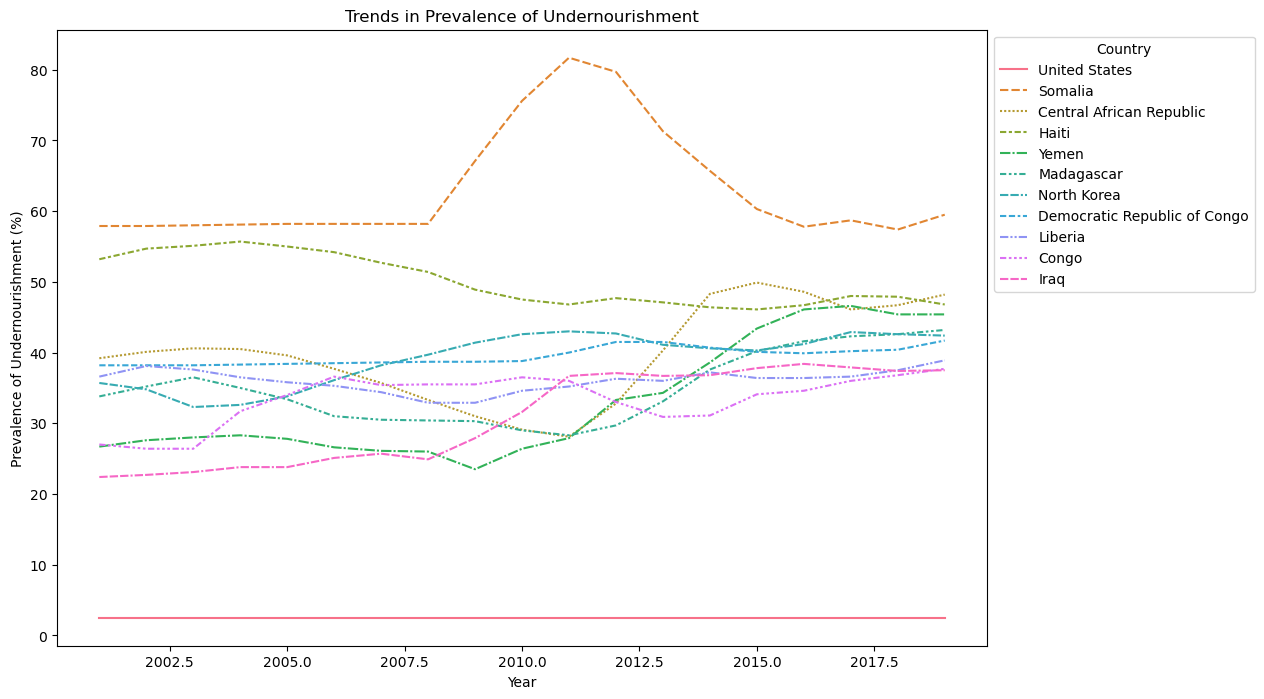

In [13]:
# Pivot the DataFrame to have years as columns and countries as rows
df_pivot = df4.pivot(index='Entity', columns='Year', values='Prevalence of undernourishment (% of population)')

# Sort the countries by the latest year's prevalence value
latest_year = df4['Year'].max()
df_sorted = df_pivot.sort_values(by=latest_year, ascending=False)

# Select the top 10 countries with the highest prevalence in the latest year
top_countries = df_sorted.index[:10]
top_countries = ['United States'] + list(top_countries)

# Filter the DataFrame to include only the top countries
df_top_countries = df_pivot.loc[top_countries]

# Plot the trends over time for the top countries
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_countries.T)
plt.title('Trends in Prevalence of Undernourishment')
plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


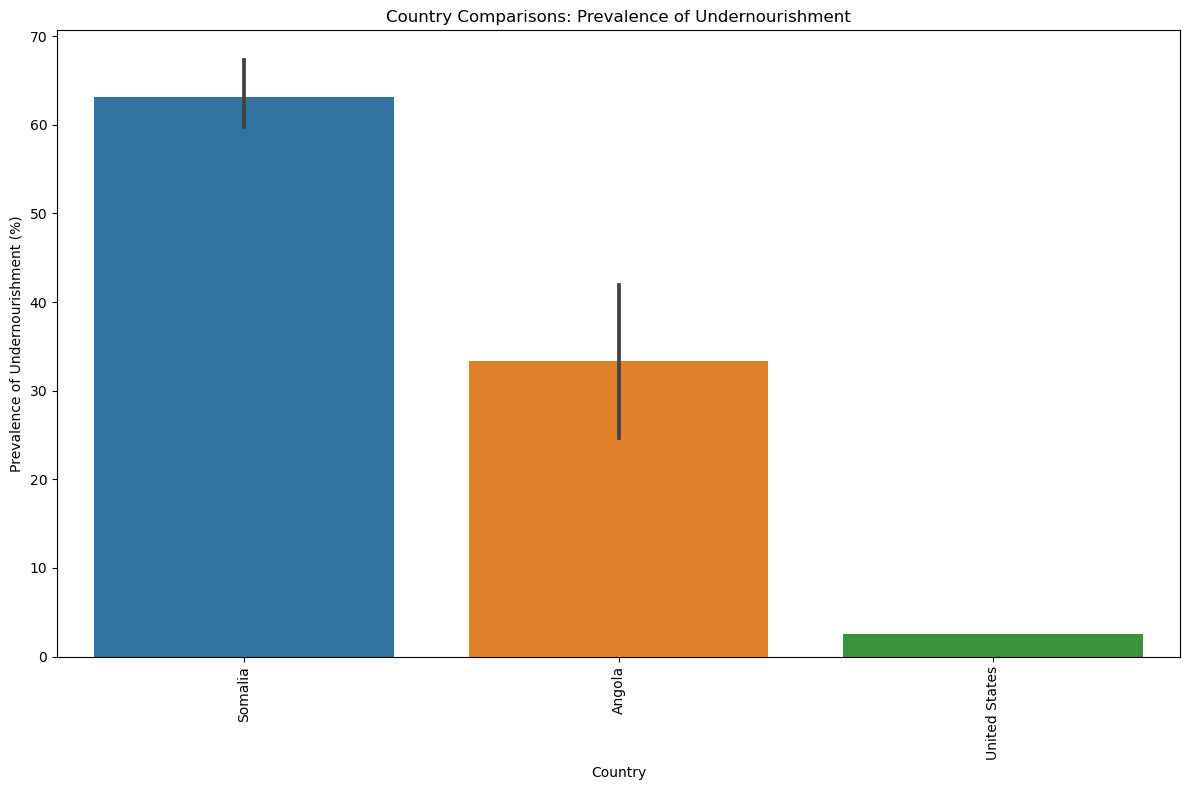

In [20]:
# Filter the DataFrame to include the desired columns
df_countries = df4[['Entity', 'Prevalence of undernourishment (% of population)']]

# Sort the DataFrame by the prevalence values in descending order
df_sorted = df_countries.sort_values(by='Prevalence of undernourishment (% of population)', ascending=False)

# Select the top 10 countries with the highest prevalence
top_countries = df_sorted.head(10)['Entity'].tolist()
top_countries.append('United States')

# Filter the DataFrame to include only the top countries
df_top_countries = df_sorted[df_sorted['Entity'].isin(top_countries)]

# Plot the country comparisons
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_countries, x='Entity', y='Prevalence of undernourishment (% of population)')
plt.title('Country Comparisons: Prevalence of Undernourishment')
plt.xlabel('Country')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust the spacing between bars and labels
plt.show()


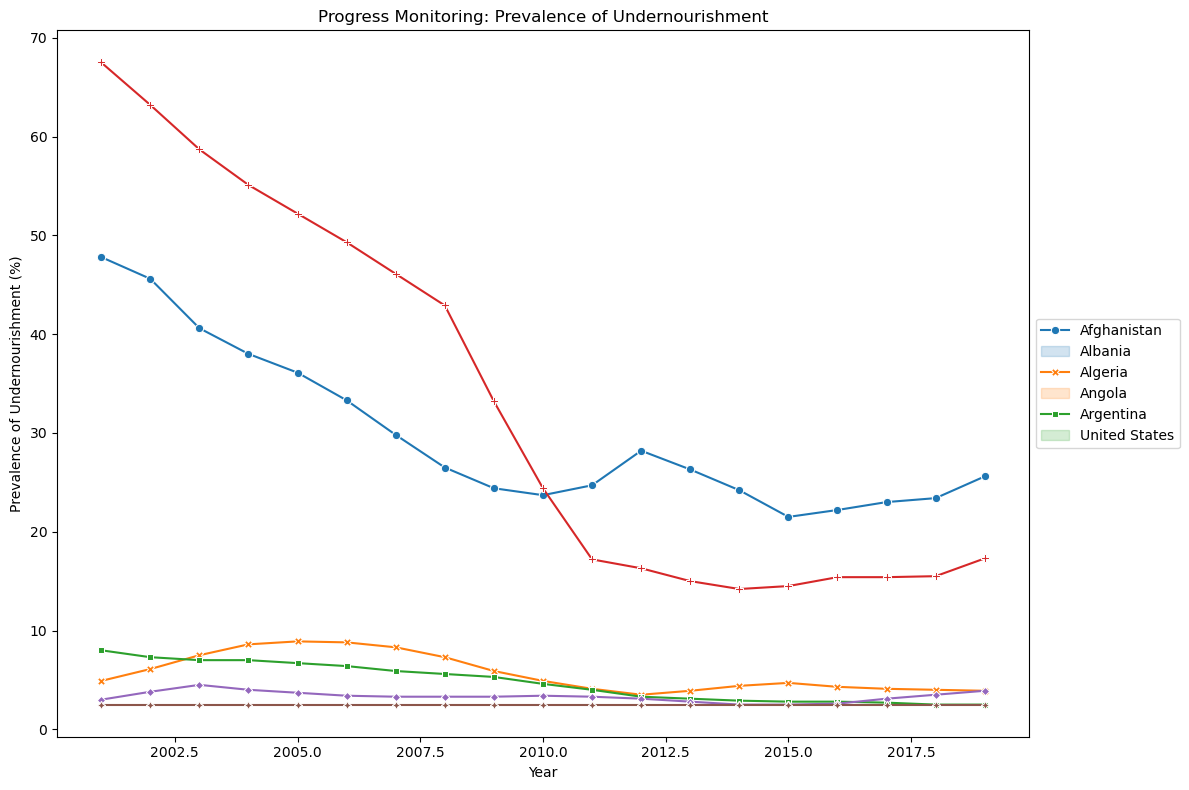

In [26]:
df_countries = df4[['Entity', 'Year', 'Prevalence of undernourishment (% of population)']]

# Filter the DataFrame to include the top 5 unique entities with the highest prevalence and the United States
top_entities = df_countries['Entity'].unique()[:5]  # Select the first 5 unique entities
top_countries = df_countries[df_countries['Entity'].isin(top_entities) | (df_countries['Entity'] == 'United States')]

# Pivot the DataFrame to have years as columns and entities as rows
df_pivot = top_countries.pivot(index='Entity', columns='Year', values='Prevalence of undernourishment (% of population)')

# Plot the progress monitoring
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_pivot.T, markers=True, dashes=False)
plt.title('Progress Monitoring: Prevalence of Undernourishment')
plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.legend(df_pivot.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Adjust the spacing between the plot elements
plt.show()


C:\Users\JaneelAbrahams\AppData\Local\Temp\ipykernel_33824\1882227692.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


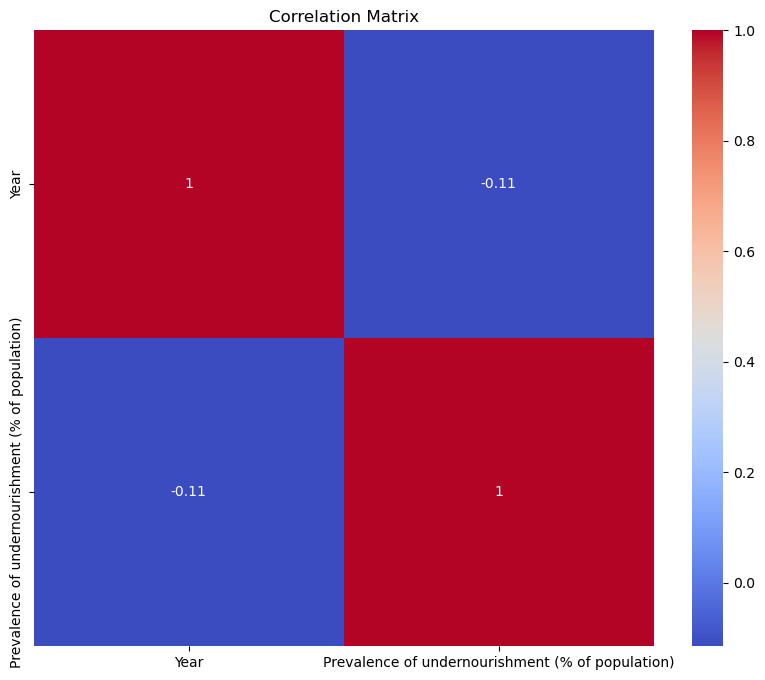

In [23]:
corr_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:

df5 = pd.read_csv('data/number_of_deaths_by_risk_factor.csv')
df5


,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


In [28]:
df5.columns


Index(['Entity', 'Code', 'Year',
       'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk: Low birth weight - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cause: All causes - Risk

In [32]:

df6 = pd.read_csv('data/global_food.csv')
df6


,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3054.9053,86.492840,38.209236
1,NaN,Afghanistan,1962,8969055,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2973.2468,84.580055,38.335213
2,NaN,Afghanistan,1963,9157463,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2751.7795,78.657250,39.338820
3,NaN,Afghanistan,1964,9355510,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3013.4424,85.198880,39.747234
4,NaN,Afghanistan,1965,9565154,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3017.7600,85.612100,40.560085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,NaN,Zimbabwe,2016,14452705,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2054.1606,57.227207,66.536940
12512,NaN,Zimbabwe,2017,14751101,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1977.5319,56.179665,62.848648
12513,NaN,Zimbabwe,2018,15052191,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.6455,54.926598,64.250500
12514,NaN,Zimbabwe,2019,15354606,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1734.0376,49.979960,56.008080


In [35]:
df6.columns

Index(['Product', 'Country', 'Year', 'Population', 'Production (t)',
       'production__tonnes__per_capita', 'Production per capita (kg)',
       'Yield (t/ha)', 'Yield (kg/animal)', 'Land Use (ha)',
       'area_harvested__ha__per_capita', 'Land Use per capita (m²)',
       'Producing or slaughtered animals',
       'Producing or slaughtered animals per capita', 'Imports (t)',
       'imports__tonnes__per_capita', 'Imports per capita (kg)', 'Exports (t)',
       'exports__tonnes__per_capita', 'Exports per capita (kg)',
       'Domestic supply (t)', 'domestic_supply__tonnes__per_capita',
       'Domestic supply per capita (kg)', 'Food (t)',
       'food__tonnes__per_capita', 'Food per capita (kg)', 'Animal feed (t)',
       'feed__tonnes__per_capita', 'Animal feed per capita (kg)',
       'Other uses (t)', 'other_uses__tonnes__per_capita',
       'Other uses per capita (kg)', 'Supply chain waste (t)',
       'waste_in_supply_chain__tonnes__per_capita',
       'Supply chain waste per c

In [44]:
#Product -empty
#production(t)-empty
# 'Food supply (kg per capita per year)' -empty

df6['Food supply (Fat g per capita per day)'].value_counts()

58.050000    3
46.020000    3
31.850000    3
29.400000    3
59.220000    3
            ..
58.463528    1
68.247955    1
65.403330    1
64.470480    1
60.942127    1
Name: Food supply (Fat g per capita per day), Length: 12207, dtype: int64

In [39]:
df6_data = df6['Country','Year','Population','Food supply (kcal per capita per day)','Food supply (Protein g per capita per day)','Food supply (Fat g per capita per day)']

KeyError: ('Country', 'Year', 'Population', 'Food supply (kcal per capita per day)', 'Food supply (Protein g per capita per day)', 'Food supply (Fat g per capita per day)')